# 7.2.1 데이터 불러오기

In [1]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3" # 사용할 GPU (몇번째 GPU인가)
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1 # GPU를 얼마나 사용할 것인가.
session = tf1.Session(config=config)

2024-05-10 06:01:22.033468: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 06:01:22.131155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 06:01:24.970504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-10 06:01:28.963149: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 40339 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:af:00.0, compute capab

In [2]:
import pandas as pd

data_path = ''

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [3]:
# 데이터 크기 확인
train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
# pd.option.display.max_columns = 24 -> 열 개수 24까지 생략없이 보여주는 옵션 설정
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
# 제출 데이터 확인
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### 피처 요약표 해석하기
1. 이진 피처 : bin_0 ~ bin_4
2. 명목형 피처 : nom_0 ~ nom_9
3. 순서형 피처 : ord_0 ~ ord_5
4. 그 외 피처 : day, month, target

In [6]:
def resumetable(df):
    print(f'데이터 셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

In [7]:
resumetable(train)

데이터 셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [8]:
# 고윳값 확인
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값 : {train[feature].unique()}')

ord_0 고유값 : [2 1 3]
ord_1 고유값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [9]:
# 고윳값 확인
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값 : {train[feature].unique()}')
# 알파벳 순으로 인코딩 예정

ord_3 고유값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [10]:
print('day 고유값', train['day'].unique()) # 요일 1~7
print('month 고유값', train['month'].unique()) # 월 1 ~ 12
print('target 고유값', train['target'].unique()) # 0~1

day 고유값 [2 7 5 4 3 1 6]
month 고유값 [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고유값 [0 1]


# 7.2.2 데이터 시각화

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

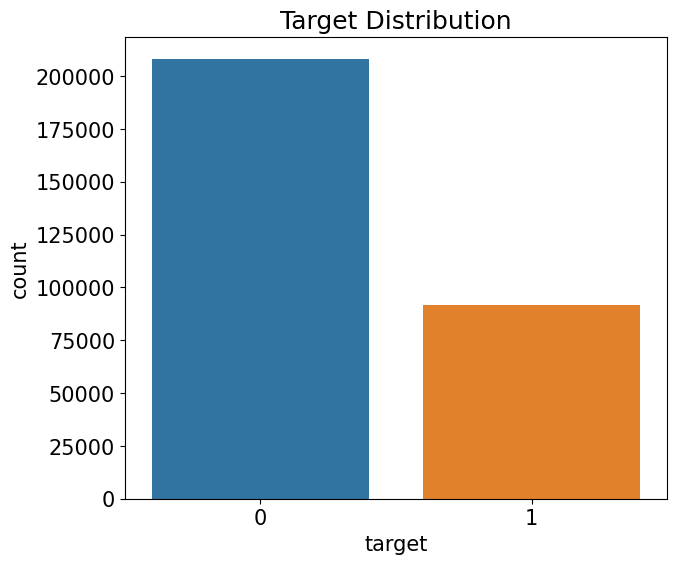

In [12]:
mpl.rc('font', size=15)
plt.figure(figsize = (7,6))

ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution');

In [13]:
# ax.patches는 'ax'축을 구성하는 그래프 도형 객체 모두를 담은 리스트 입니다.
rectangle = ax.patches[0]
print('사각형 높이', rectangle.get_height())
print('사각형 넓이', rectangle.get_width())
print('사격형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이 208236.0
사각형 넓이 0.8
사격형 왼쪽 테두리의 x축 위치: -0.4


x좌표 : letf_coord + width/2  
y좌표 : height + len(train) * 0.001
+ len(train) * 0.001 은 여백

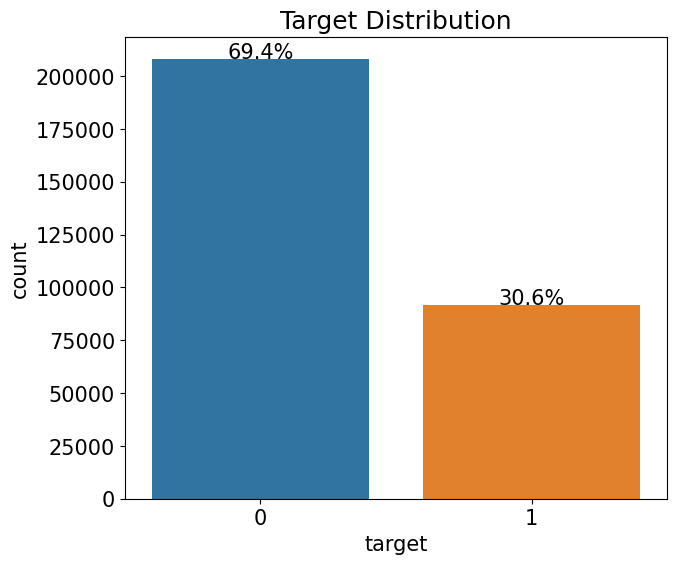

In [14]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x,y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,
               y=height + total_size*0.001,
               s=f'{percent:1.1f}%',
               ha='center')

plt.figure(figsize = (7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

## 이진 피처 분포

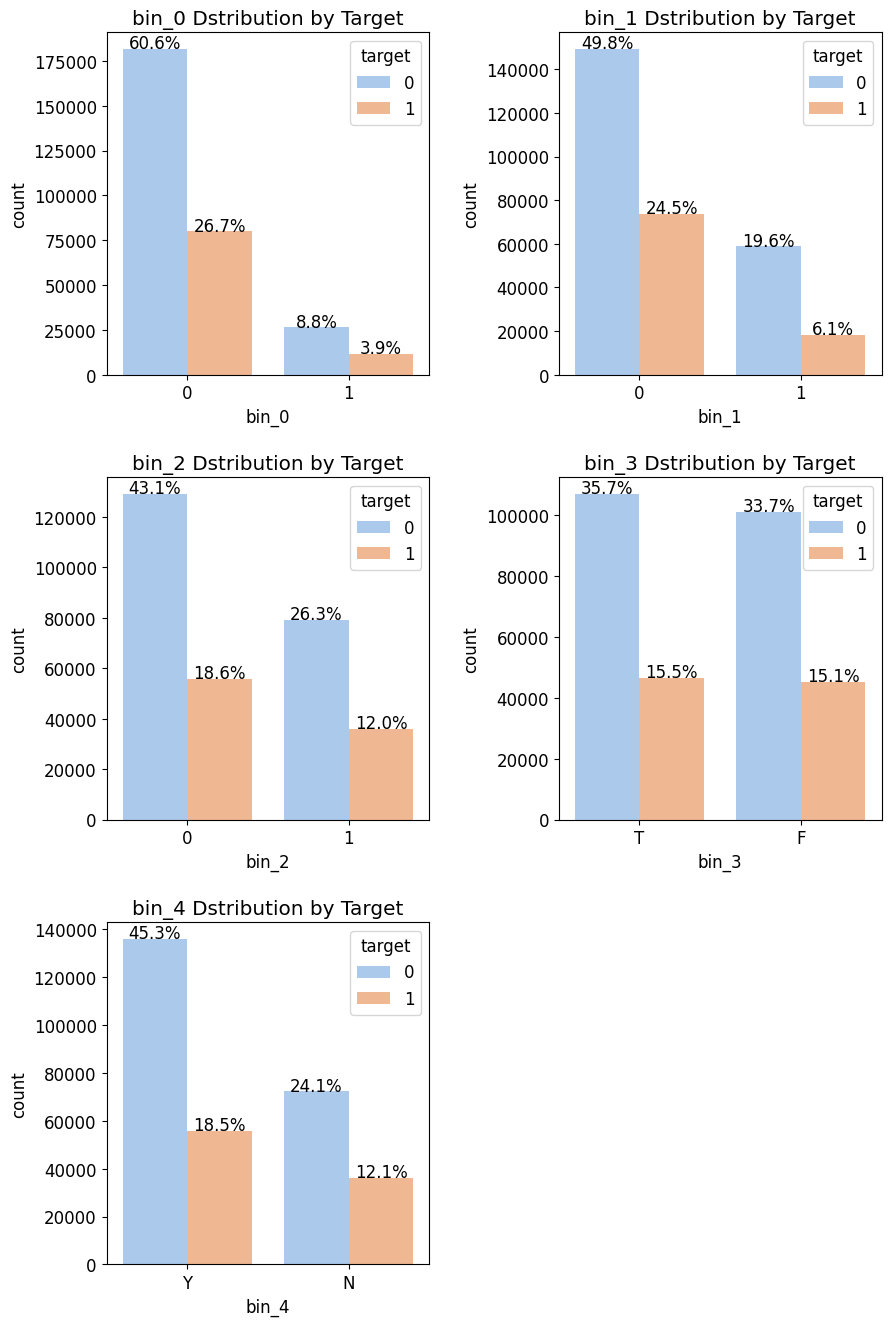

In [15]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치
# 3행 2열 틀(figure) 준비

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정


# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx]) # idx를 사용해서 서브플롯의 번호를 부여

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                 data=train,
                 hue='target',
                 palette='pastel',
                 ax=ax)

    ax.set_title(f'{feature} Dstribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train)) # 비율 표시



### 스텝 1 교차분석표 생성 함수 만들기  
교차표 혹은 교차분석표는 범주형 데이터 2개를 비교 분석하는 데 사용되는 표로, 각 범주형 데이터의 빈도나 통계량을 행과 열로 결합해놓은 표를 말한다. 여기서 교차분석표는 명목형 피처별 타깃값 1의 비율을 구하기 위함이다.

In [16]:
# nom_0 vs. target 갯수 출력
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [17]:
# nom_0 vs. target 비율 출력
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100
crosstab
# 예) 전체 blue 중 0인 비율과 1인 비율 표기

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [18]:
# index를 열로 가져오기 -> 그래프를 그리기 편하게 하기 위해서
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [19]:
# crosstab 과정 함수 선언
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize = 'index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [20]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


### 스텝 2 포인트플롯 생성 함수 만들기

In [21]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트 플롯 그리그
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black') # 포인트 플롯 색상
                       # legend=False)# 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

### 스텝 3 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [22]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize = size) # 전체 figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        #ax축에 타깃값 분포 카운트 플롯 그리기
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue',
                     ax=ax)

        write_percent(ax, len(df)) # 비율 표시

        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

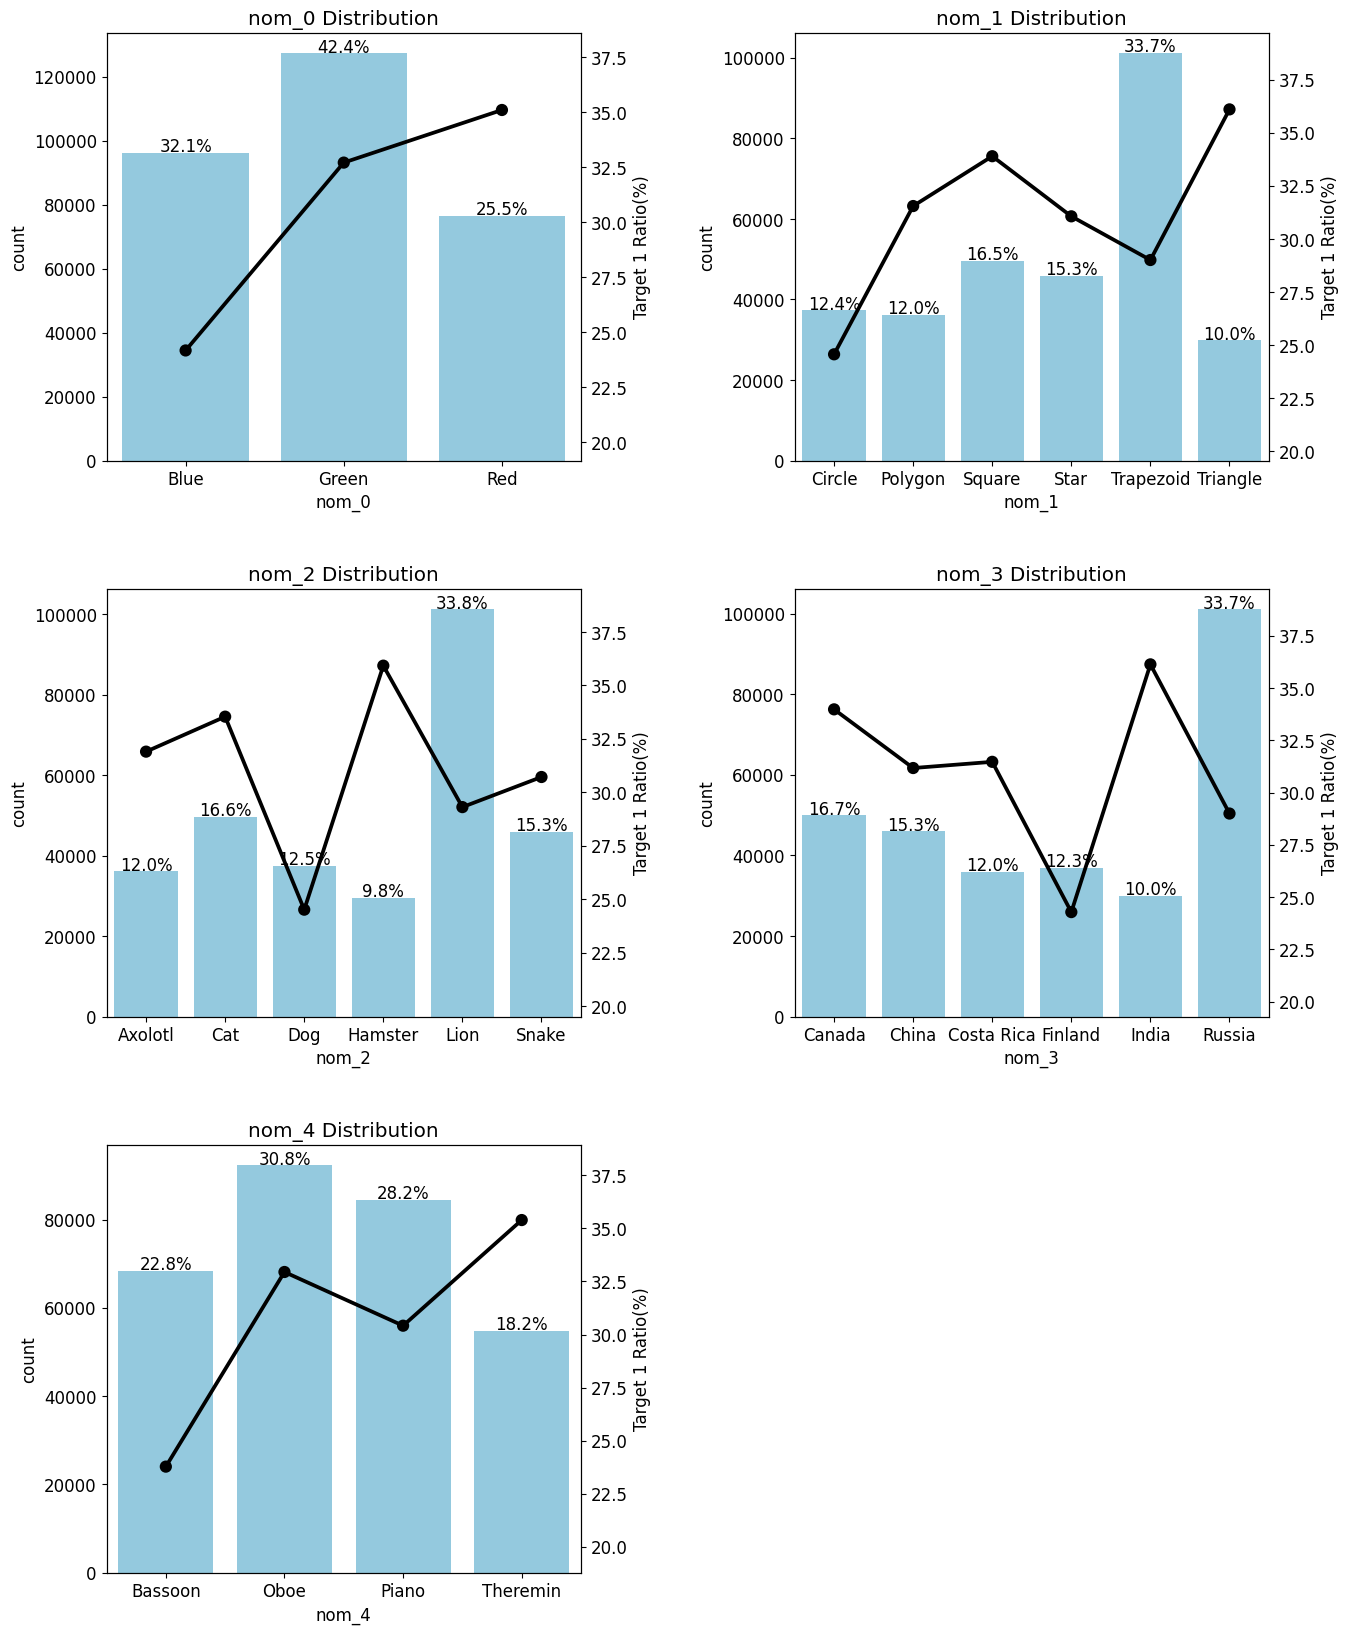

In [23]:
nom_feature = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_feature, num_rows=3, num_cols=2)

## 순서형 피처 분포

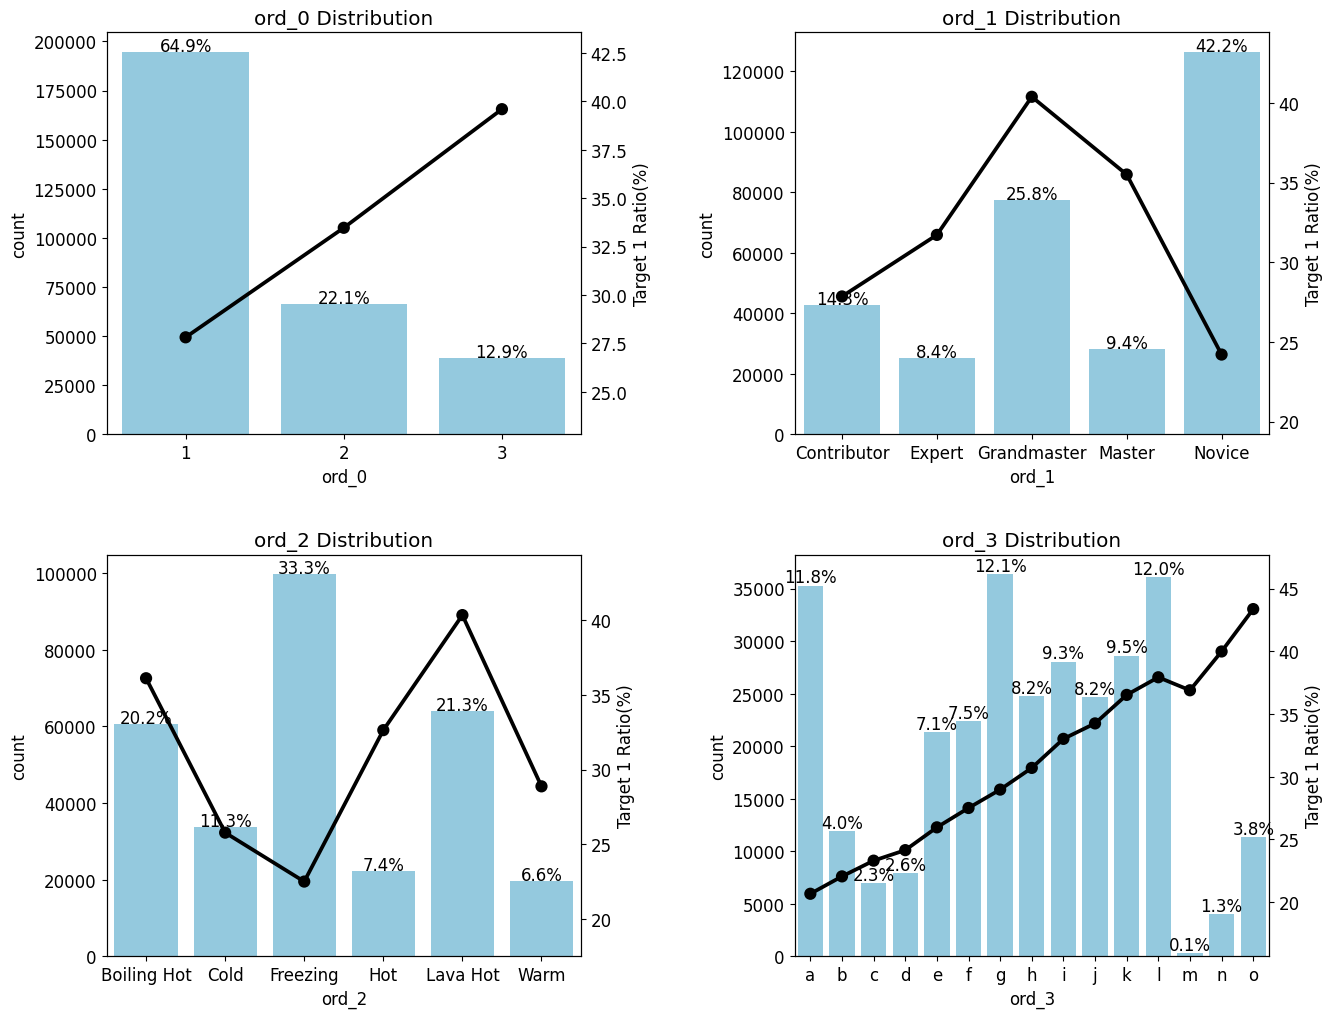

In [24]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

In [25]:
# countplot에 order 파라미터에 True를 입력하면 알파벳 순서에서 입력된 순서대로 정렬이 가능하지만,
# train 데이터에 직접 category의 순서를 부여하기 위함
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', "Grandmaster"]
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

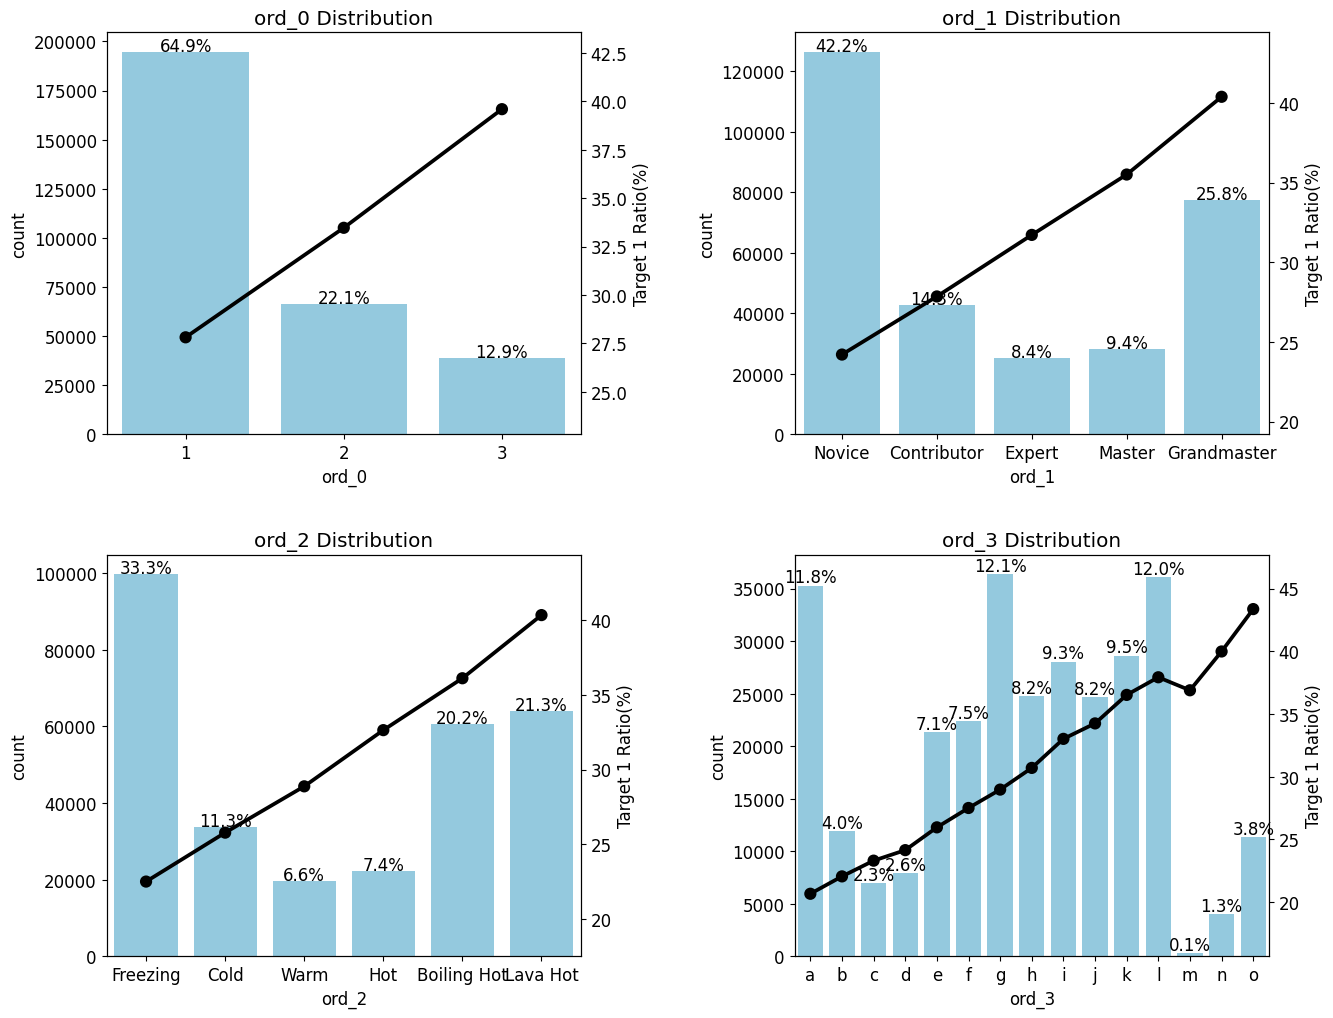

In [26]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

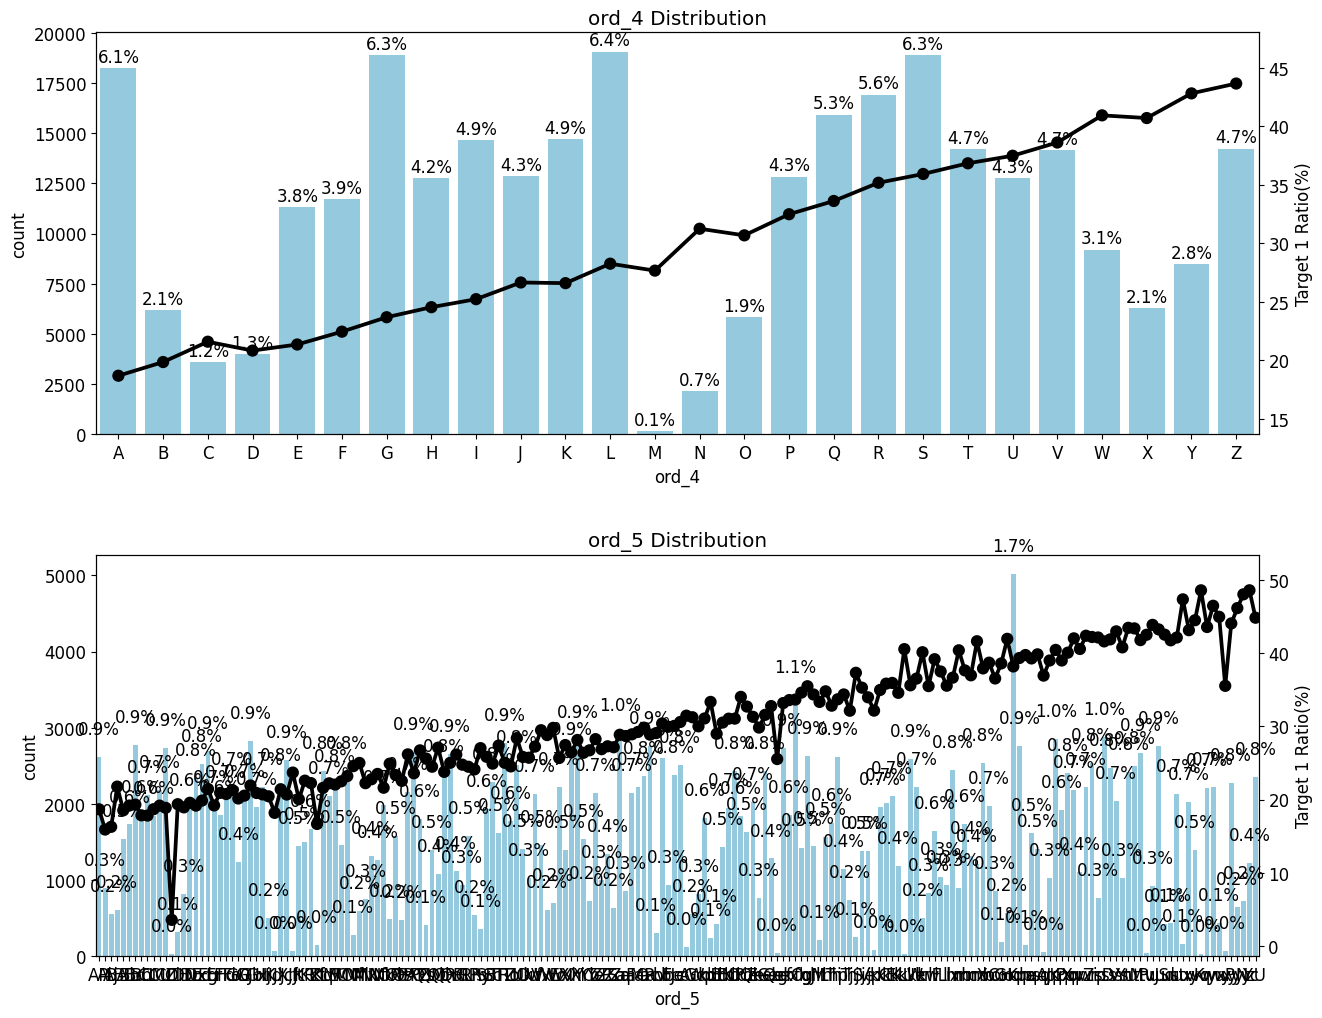

In [27]:
# ord_4 and ord_5
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows = 2, num_cols = 1, size=(15,12))

## 날짜 피처 분포

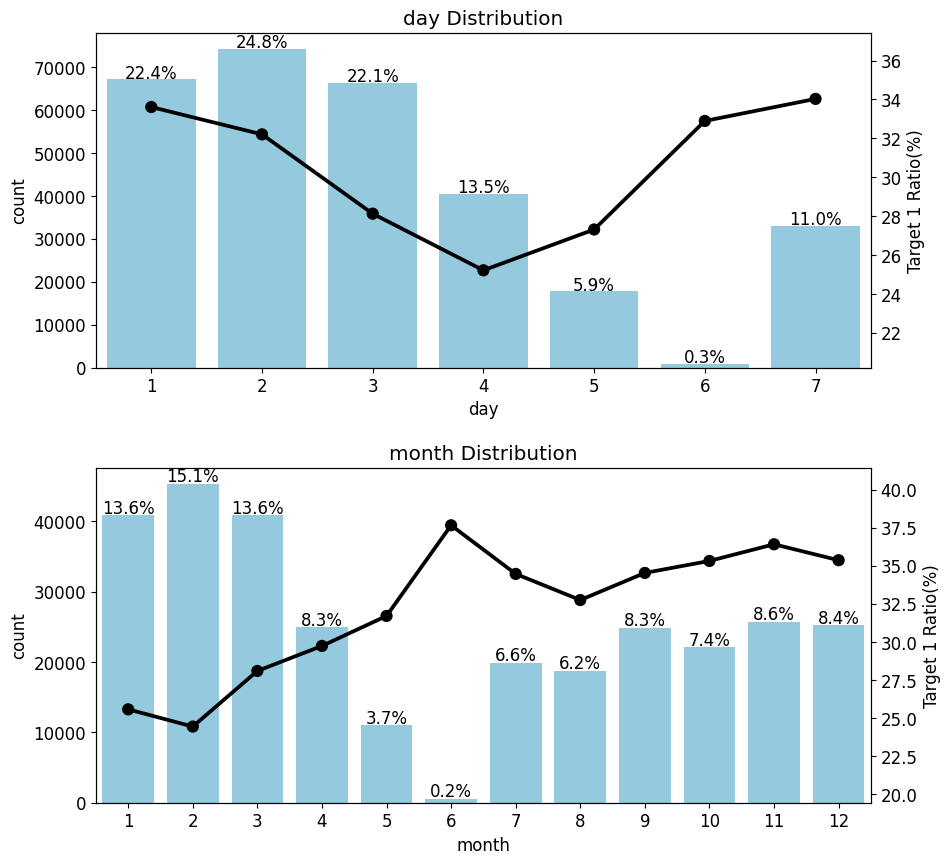

In [28]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10,10))

# 분석 정리 및 모델링 전략

**분석정리**
1. 결측값 없음
2. 모든 피처가 중요함
3. 이진 피처 인코딩 : 값이 숫자가 아닌 이진 피처는 0과 1로 인코딩
4. 명목형 피처 인코딩 : 전체 데이터가 크지 않으므로 모두 원-핫 인코딩
5. 순서형 피처 인코딩 : 고유값들의 순서에 맞게 인코딩
6. 날자 피처 인코딩 : 원-핫인코딩(데이터가 작아서 cyclical data(순환 데이터)를 적용하지 않음, 실험결과 정확도가 낮아짐)

**모델링 전략**
이번 장의 목표는 데이터 특성에 따른 맞춤형 인코딩 방법을 익힌다.
+ 베이스라인 모델 : 로지스틱 회귀 모델
    + 피처 엔지니어링 : 모든 피처를 원-핫 인코딩
+ 성능개선 : 추가 피처 엔지니어링과 하이퍼파라미터 최적화
    + 피처 엔지니어링 : 피처 맞춤 인코딩과 피처 스케일링
    + 하이퍼파라미터 최적화 : 그리드 서치
    + 추가 팁 : 검증 데이터를 훈련에 이용

ref : https://www.kaggle.com/dkomyagin/cat-in-the-dat-0-80285-private-lb-solution


# 7.3 베이스 라인 모델
# 7.3.1 피처 엔지니어링

In [29]:
import pandas as pd
data_path = ""

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [30]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('target', axis=1) # 타깃값 제거

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [31]:
num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

# 7.3.2 모델 훈련

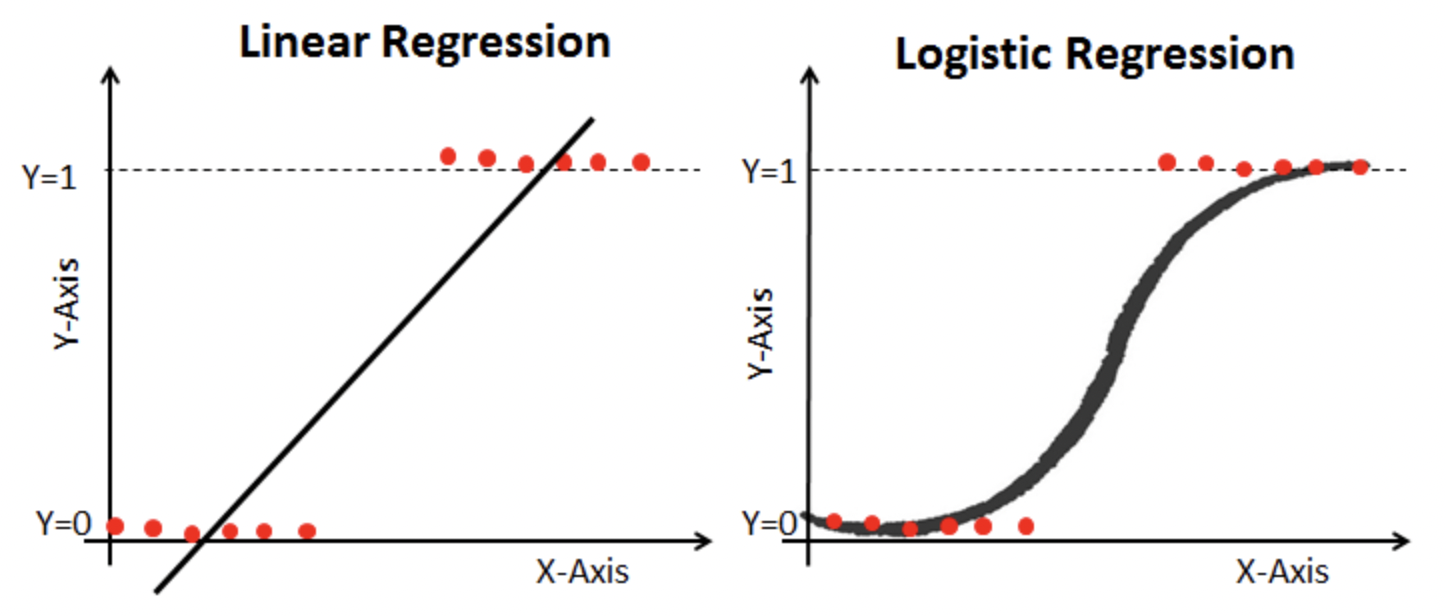

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

In [ ]:
y_preds = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
submission['target'] = y_preds
submission.to_csv('submission1.csv')
#
# Score: 0.77573
# Public score: 0.78054

# 7.4 성능 개선(1)

In [33]:
import pandas as pd
data_path = ''

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [34]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1) # 타깃값 제거

## 이진 피처 인코딩

In [35]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

## 순서형 피처 인코딩

In [36]:
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot': 5}
all_data['ord_1'] = all_data['ord_1'].replace(ord1dict)
all_data['ord_2'] = all_data['ord_1'].replace(ord2dict)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성 
# 순서에 따라 숫자로 매핑
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)


ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

## 명목형 피처 인코딩

In [38]:
# 명목형 피처 인코딩
nom_features = ['nom_' + str(i) for i in range(10)]

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
encoded_nom_matrix # 원-핫 인코딩은 회소 행렬을 CSR 형식으로 반환

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

**희소 행렬과 COO, CSR 형식**  
대부분 값이 0으로 채워진 행렬을 희소 행렬(sparse matrix)이라고 한다. 반대로 대부분 값이 0이 아닌 값으로 채워진 행렬을 밀집 행렬(dense matrix)이라고 한다. 원-핫 인코딩을 적용하면 희소 행렬을 만든다. 희소행렬은 메모리 낭비가 심해지고 행렬 크기도 커져서 연산 시간도 오래 걸리게 된다.  
이런 문제를 개선하기 위해서 행렬 형식을 변환해주는데 대표적으로 COO(coordinate list) 형식과 CSR(compressed sparse row) 형식이 있다. 이 중 CSR이 메모리를 더 적게 쓰면서 연산도 빨라서 주로 사용된다.

In [39]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

## 날짜 피처 인코딩

In [40]:
# 날짜피처 인코딩
date_features = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

# 7.4.2 피처 엔지니어링(2) : 피처 스케일링

## 순서형 피처 스케일링

In [41]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

## 인코딩 및 스케일링된 피처 합치기

In [42]:
from scipy import sparse
# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                              encoded_nom_matrix,
                              encoded_date_matrix],
                             format='csr')
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9118906 stored elements in Compressed Sparse Row format>

## 데이터 나누기

In [43]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0~num_train - 1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y=train['target']

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_alid = train_test_split(X_train, y, test_size = 0.1, stratify=y, random_state=10)

# 7.4.3 하이퍼파라미터 최적화

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800,900,1000],
            'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                        param_grid=lr_params,
                                        scoring='roc_auc', # 평가지표
                                        cv=5)

# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

# 7.4.4 모델 성능 검증

In [ ]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:,1]

from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

In [ ]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission2.csv')

# 0.78164, 0.79097

In [48]:
X_test.shape

(200000, 16306)

# 트리 랜덤서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# 의사결정 트리 모델 생성
tree_model = DecisionTreeClassifier()

# 하이퍼파라미터 분포 설정
tree_params = {'max_depth': [None, 5, 10],
               'min_samples_split': randint(2, 11),
               'min_samples_leaf': randint(1, 5),
               'random_state': [42]}

# 랜덤 서치 객체 생성
random_search_tree_model = RandomizedSearchCV(estimator=tree_model,
                                              param_distributions=tree_params,
                                              scoring='roc_auc',
                                              cv=5,
                                              n_iter=10,
                                              random_state=42,
                                              verbose=2)

# 랜덤 서치 수행
random_search_tree_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', random_search_tree_model.best_params_)
y_valid_preds = random_search_tree_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

# 테스트 데이터 예측
y_preds = random_search_tree_model.best_estimator_.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_random_tree.csv')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=9, random_state=42; total time=  42.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=9, random_state=42; total time=  35.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=9, random_state=42; total time=  39.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=9, random_state=42; total time=  50.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=9, random_state=42; total time=  33.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, random_state=42; total time=11.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, random_state=42; total time=10.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, random_state=42; total time=12.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, random_state=42; total time=12.4min
[CV] END max_depth=None, min_sa

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
forest_model = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                      min_samples_split=2, min_samples_leaf=1, 
                                      random_state=42)

# 모델 학습
forest_model.fit(X_train, y_train)

# 검증 데이터 예측
y_valid_preds = forest_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC: {roc_auc:.4f}')

# 테스트 데이터 예측
y_preds = forest_model.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_forest.csv')

# 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 다층 퍼셉트론(MLP) 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_valid, y_valid))

# 검증 데이터에 대한 ROC AUC 계산
from sklearn.metrics import roc_auc_score
y_valid_preds = model.predict(X_valid)
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC: {roc_auc:.4f}')

# 테스트 데이터에 대한 예측
y_preds = model.predict(X_test)

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_mlp.csv')


# 7.5 성능 개선(2)
훈련 데이터의 전체를 모델 학습에 사용한다.

In [44]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0~num_train - 1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y=train['target']

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_alid = train_test_split(X_train, y, test_size = 0.1, stratify=y, random_state=10)

In [45]:
X_train.shape, y.shape, X_valid.shape

((270000, 16306), (300000,), (30000, 16306))

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800,900,1000],
            'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                        param_grid=lr_params,
                                        scoring='roc_auc', # 평가지표
                                        cv=5)

# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

In [ ]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission3.csv')

# 성능 개선 3

In [48]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.4 MB/s eta 0:00:00 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


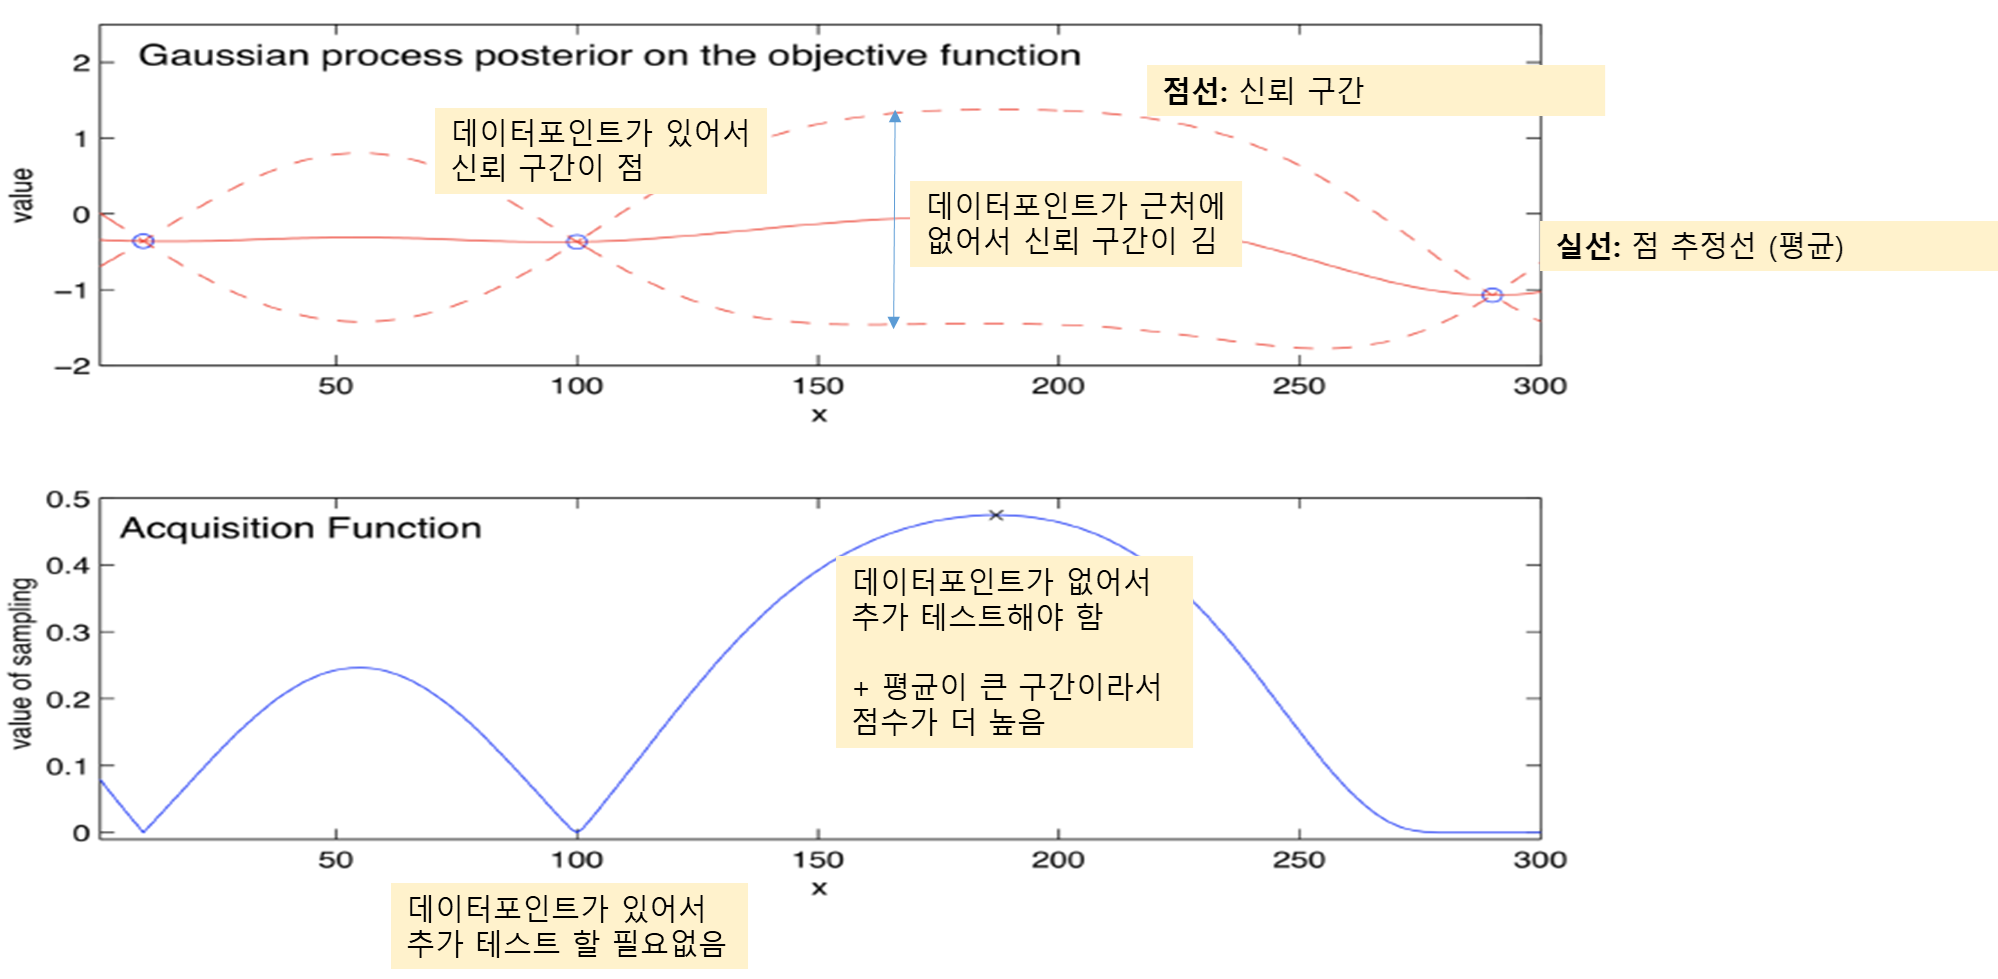

그리드 검색: 미리 정의된 하이퍼파라미터 조합의 그리드를 생성하고 이 그리드에 대해 모든 가능한 조합을 탐색합니다. 이는 미리 지정된 값들만을 고려하므로 탐색 공간이 넓을수록 계산 비용이 증가하고 효율성이 낮아집니다.
베이지안 최적화: 확률적 모델링을 사용하여 하이퍼파라미터 공간을 탐색합니다. 이전에 시도한 하이퍼파라미터 조합의 결과를 기반으로 하이퍼파라미터 공간을 효율적으로 탐색합니다. 따라서 불필요한 조합을 건너뛰고 최적의 조합에 빠르게 수렴할 수 있습니다.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV

In [47]:
logistic_model = LogisticRegression()

In [52]:
lr_params = {'C': (0.1, 0.5), 'max_iter': (800, 1000)}

# 베이지안 최적화 객체 생성
bayes_logistic_model = BayesSearchCV(estimator=logistic_model,
                                     search_spaces=lr_params,
                                     scoring='roc_auc',
                                     n_iter=5,  # 반복 횟수
                                     random_state=42,
                                    verbose =2)

In [ ]:
bayes_logistic_model.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print('최적 하이퍼파라미터:', bayes_logistic_model.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................C=0.26404158354132556, max_iter=946; total time= 5.7min
[CV] END ................C=0.26404158354132556, max_iter=946; total time= 5.5min
[CV] END ................C=0.26404158354132556, max_iter=946; total time= 5.5min
[CV] END ................C=0.26404158354132556, max_iter=946; total time= 5.6min
[CV] END ................C=0.26404158354132556, max_iter=946; total time= 5.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................C=0.4349553422213138, max_iter=977; total time= 8.1min
[CV] END .................C=0.4349553422213138, max_iter=977; total time=10.6min
[CV] END .................C=0.4349553422213138, max_iter=977; total time= 6.6min
[CV] END .................C=0.4349553422213138, max_iter=977; total time= 7.4min


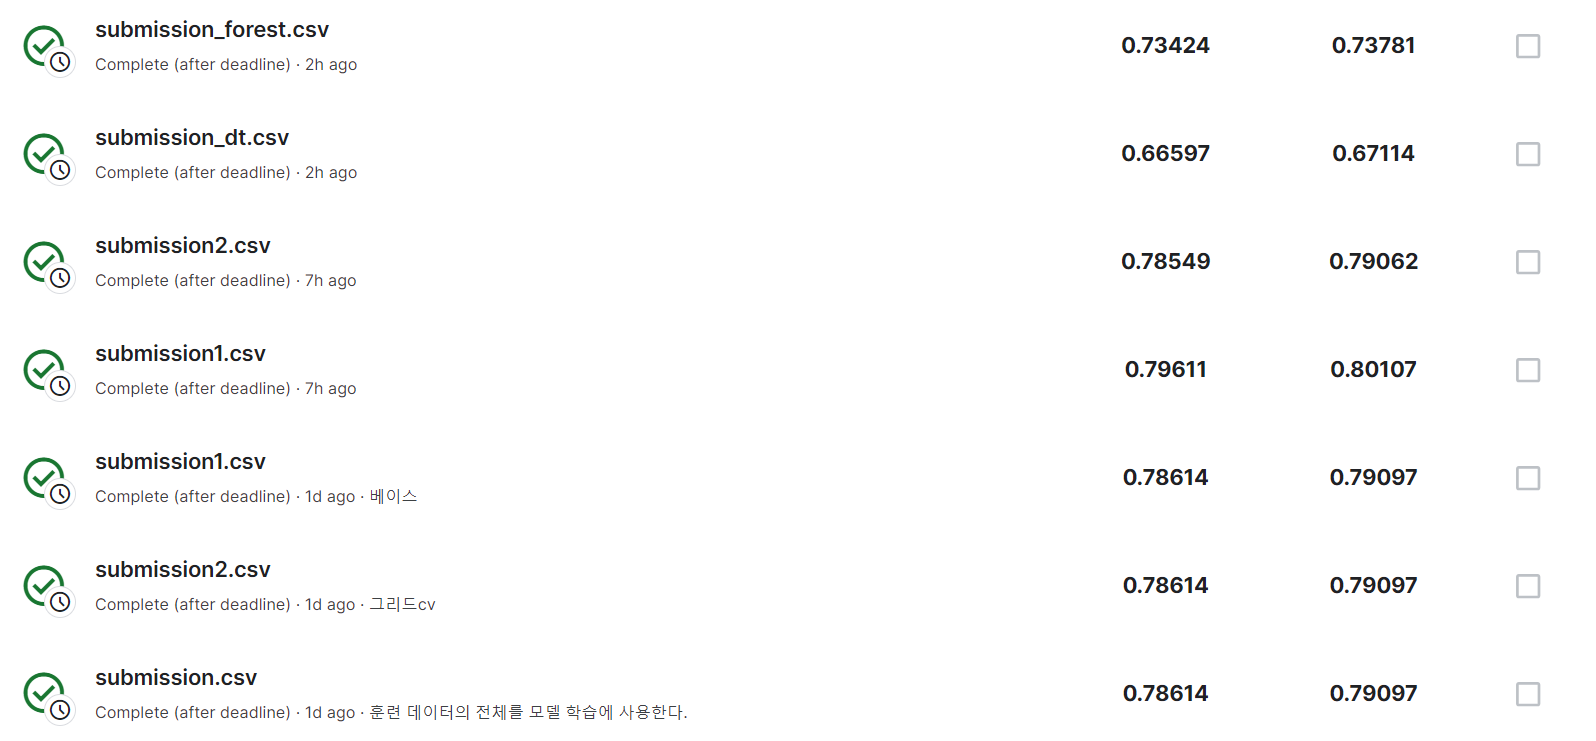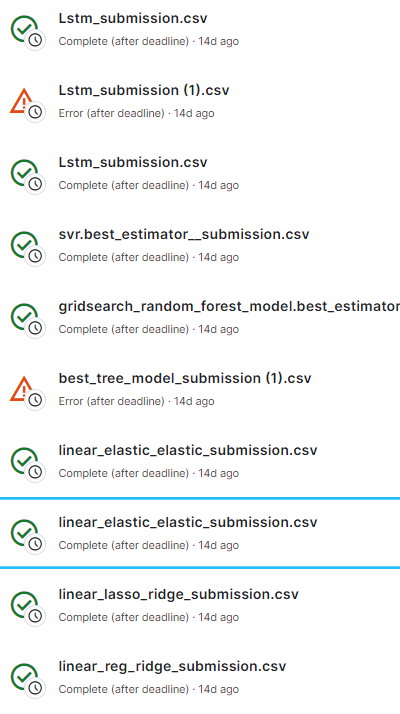

In [ ]:
# 테스트 데이터에 대한 예측
y_preds = bayes_logistic_model.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_bayes_logistic.csv', index=False)

# 0.78342

# Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 생성
dt_model = DecisionTreeClassifier()

# 하이퍼파라미터 값 목록
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}

# 그리드서치 객체 생성
gridsearch_dt_model = GridSearchCV(estimator=dt_model,
                                   param_grid=dt_params,
                                   scoring='roc_auc',  # 평가지표
                                   cv=5)

# 그리드서치 수행
gridsearch_dt_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_dt_model.best_params_)

# 타깃값 1일 확률 예측
y_preds = gridsearch_dt_model.best_estimator_.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_dt.csv')


# lightgbm

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM 모델 생성
lgb_model = LGBMClassifier()

# 하이퍼파라미터 값 목록
lgb_params = {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [100, 200, 300]}

# 그리드서치 객체 생성
gridsearch_lgb_model = GridSearchCV(estimator=lgb_model,
                                    param_grid=lgb_params,
                                    scoring='roc_auc',  # 평가지표
                                    cv=5)

# 그리드서치 수행
gridsearch_lgb_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_lgb_model.best_params_)

# 타깃값 1일 확률 예측
y_preds = gridsearch_lgb_model.best_estimator_.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_lgb.csv')


# SVM

In [ ]:
from sklearn.svm import SVC

# SVM 모델 생성
svm_model = SVC(probability=True)

# 하이퍼파라미터 값 목록
svm_params = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# 그리드서치 객체 생성
gridsearch_svm_model = GridSearchCV(estimator=svm_model,
                                    param_grid=svm_params,
                                    scoring='roc_auc',  # 평가지표
                                    cv=5)

# 그리드서치 수행
gridsearch_svm_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_svm_model.best_params_)

# 타깃값 1일 확률 예측
y_preds = gridsearch_svm_model.best_estimator_.predict_proba(X_test)[:, 1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission_svm.csv')


In [53]:
# def model_evaluation(train_data, test_data, train_target, models_dict, valid_data=None, valid_target=None):
#     results = []
#     submissions = {}

#     for model_name, model_data in models_dict.items():
#         print(f"Training {model_name}...")
        
#         model = model_data["model"]
#         params = model_data["params"]
        
#         gridsearch_model = GridSearchCV(estimator=model,
#                                         param_grid=params,
#                                         scoring='roc_auc',
#                                         verbose=2)  # verbose=2로 설정하여 상세 정보 출력
        
#         gridsearch_model.fit(train_data, train_target)
        
#         print(f"Best parameters for {model_name}: {gridsearch_model.best_params_}")
        
#         if valid_data is not None and valid_target is not None:
#             y_valid_preds = gridsearch_model.best_estimator_.predict_proba(valid_data)[:,1]
#             f1 = f1_score(valid_target, gridsearch_model.best_estimator_.predict(valid_data))
#             roc_auc = roc_auc_score(valid_target, y_valid_preds)
#             results.append({"Model": model_name, "ROC AUC": roc_auc, "F1 Score": f1})
        
#         y_preds = gridsearch_model.best_estimator_.predict_proba(test_data)[:,1]
#         submissions[model_name] = y_preds
    
#     if valid_data is not None and valid_target is not None:
#         print(pd.DataFrame(results))
    
#     for model_name, y_preds in submissions.items():
#         submission = pd.DataFrame()
#         submission['target'] = y_preds
#         submission.to_csv(f'{model_name}_submission.csv', index=False)

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)
# #
# # 모델 딕셔너리
# models = {
#     "Logistic Regression": {"model": LogisticRegression(), "params": {'C':[0.1], 'max_iter':[800], 'solver':['liblinear'], 'random_state':[42]}},
#     "Support Vector Machine": {"model": SVC(probability=True), "params": {'C': [10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}},
#     "Decision Tree": {"model": DecisionTreeClassifier(), "params": {'criterion': ['gini', 'entropy'], 'max_depth': [10]}},
#     "XGBoost": {"model": XGBClassifier(eval_metric='logloss'), "params": {'learning_rate': [0.1], 'n_estimators': [100]}},
#     "LightGBM": {"model": LGBMClassifier(), "params": {'learning_rate': [0.05], 'n_estimators': [100]}}
# }

# model_evaluation(X_train, X_test, y_train, models, X_valid, y_valid)

Training Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.1, max_iter=800, random_state=42, solver=liblinear; total time=  37.8s
[CV] END C=0.1, max_iter=800, random_state=42, solver=liblinear; total time=  44.2s
[CV] END C=0.1, max_iter=800, random_state=42, solver=liblinear; total time=  41.2s
[CV] END C=0.1, max_iter=800, random_state=42, solver=liblinear; total time=  38.4s
[CV] END C=0.1, max_iter=800, random_state=42, solver=liblinear; total time=  39.8s
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
Training Support Vector Machine...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


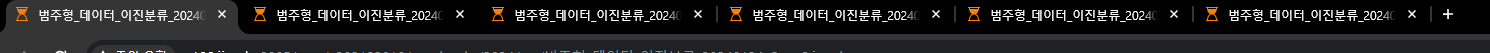